In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/wine-clustering.csv')

In [6]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
data.fillna(method='ffill', inplace= True)

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
data_normalized = normalize(data_scaled)

In [12]:
data_normalized = pd.DataFrame(data_normalized)

In [13]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['P1', 'P2']
print(data_principal.head())

         P1        P2
0 -0.832433 -0.318834
1 -0.639443  0.091947
2 -0.756882 -0.243317
3 -0.805447 -0.510057
4 -0.373903 -0.311604


In [14]:
db_default = DBSCAN(eps = 0.5, min_samples = 50).fit(data_principal)
labels = db_default.labels_

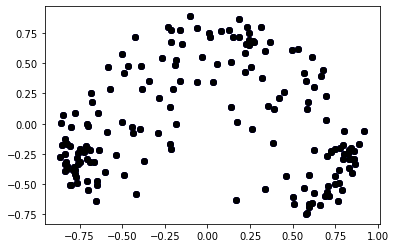

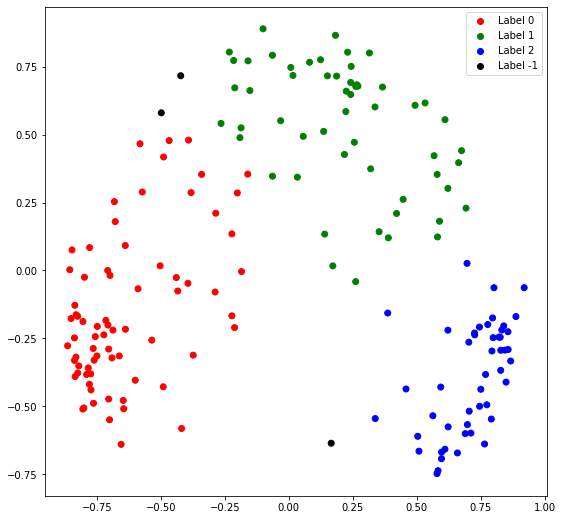

In [15]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
cvec = [colours[label] for label in labels]
r = plt.scatter(data_principal['P1'], data_principal['P2'], color ='r');
g = plt.scatter(data_principal['P1'], data_principal['P2'], color ='g');
b = plt.scatter(data_principal['P1'], data_principal['P2'], color ='b');
k = plt.scatter(data_principal['P1'], data_principal['P2'], color ='k');
plt.figure(figsize =(9, 9))
plt.scatter(data_principal['P1'], data_principal['P2'], c = cvec)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()